<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Measure/M04_Accessing_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04 Measure** Accessing image data
```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2023
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook explores how to access image data: both the visuals themselves and associated metadata. It assumes you've understood the first three notebooks. In particular, how we load in external libraries and packages, the basics of data structures and functions, and opening image files.

- PIL basics
- Accessing image data
- Accessing pixels
- Accessing metadata

To open HEIC photos taken by iPhone, we'll need an additional package.

In [ ]:
!pip install pillow-heif --quiet

As before, we'll need to import the right libraries into this notebook.

In [25]:
import PIL
from pathlib import Path
from pillow_heif import register_heif_opener

register_heif_opener()

... and connect to Google Drive and set the appropriate direcotry for the example data. You can find it here on [GitHub](https://github.com/brian-ho/intro-to-urban-data/tree/main/Measure/Example%20Data). Or, try this with your own data!

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

In [26]:
EXAMPLE_DATA_DIRECTORY = "Example Data"

## PIL basics
`PIL`, or [Python Image Library](https://pillow.readthedocs.io/en/stable/), provides image operations in Python.

It won't replace more advanced image editing tools for design, but it's a great way to work with image data more directly and efficiently.

Let's start by opening an image file, using the `Image` class to create an object. Basically, this opens the file and loads it into a Python format provided by `PIL` that we can work with.



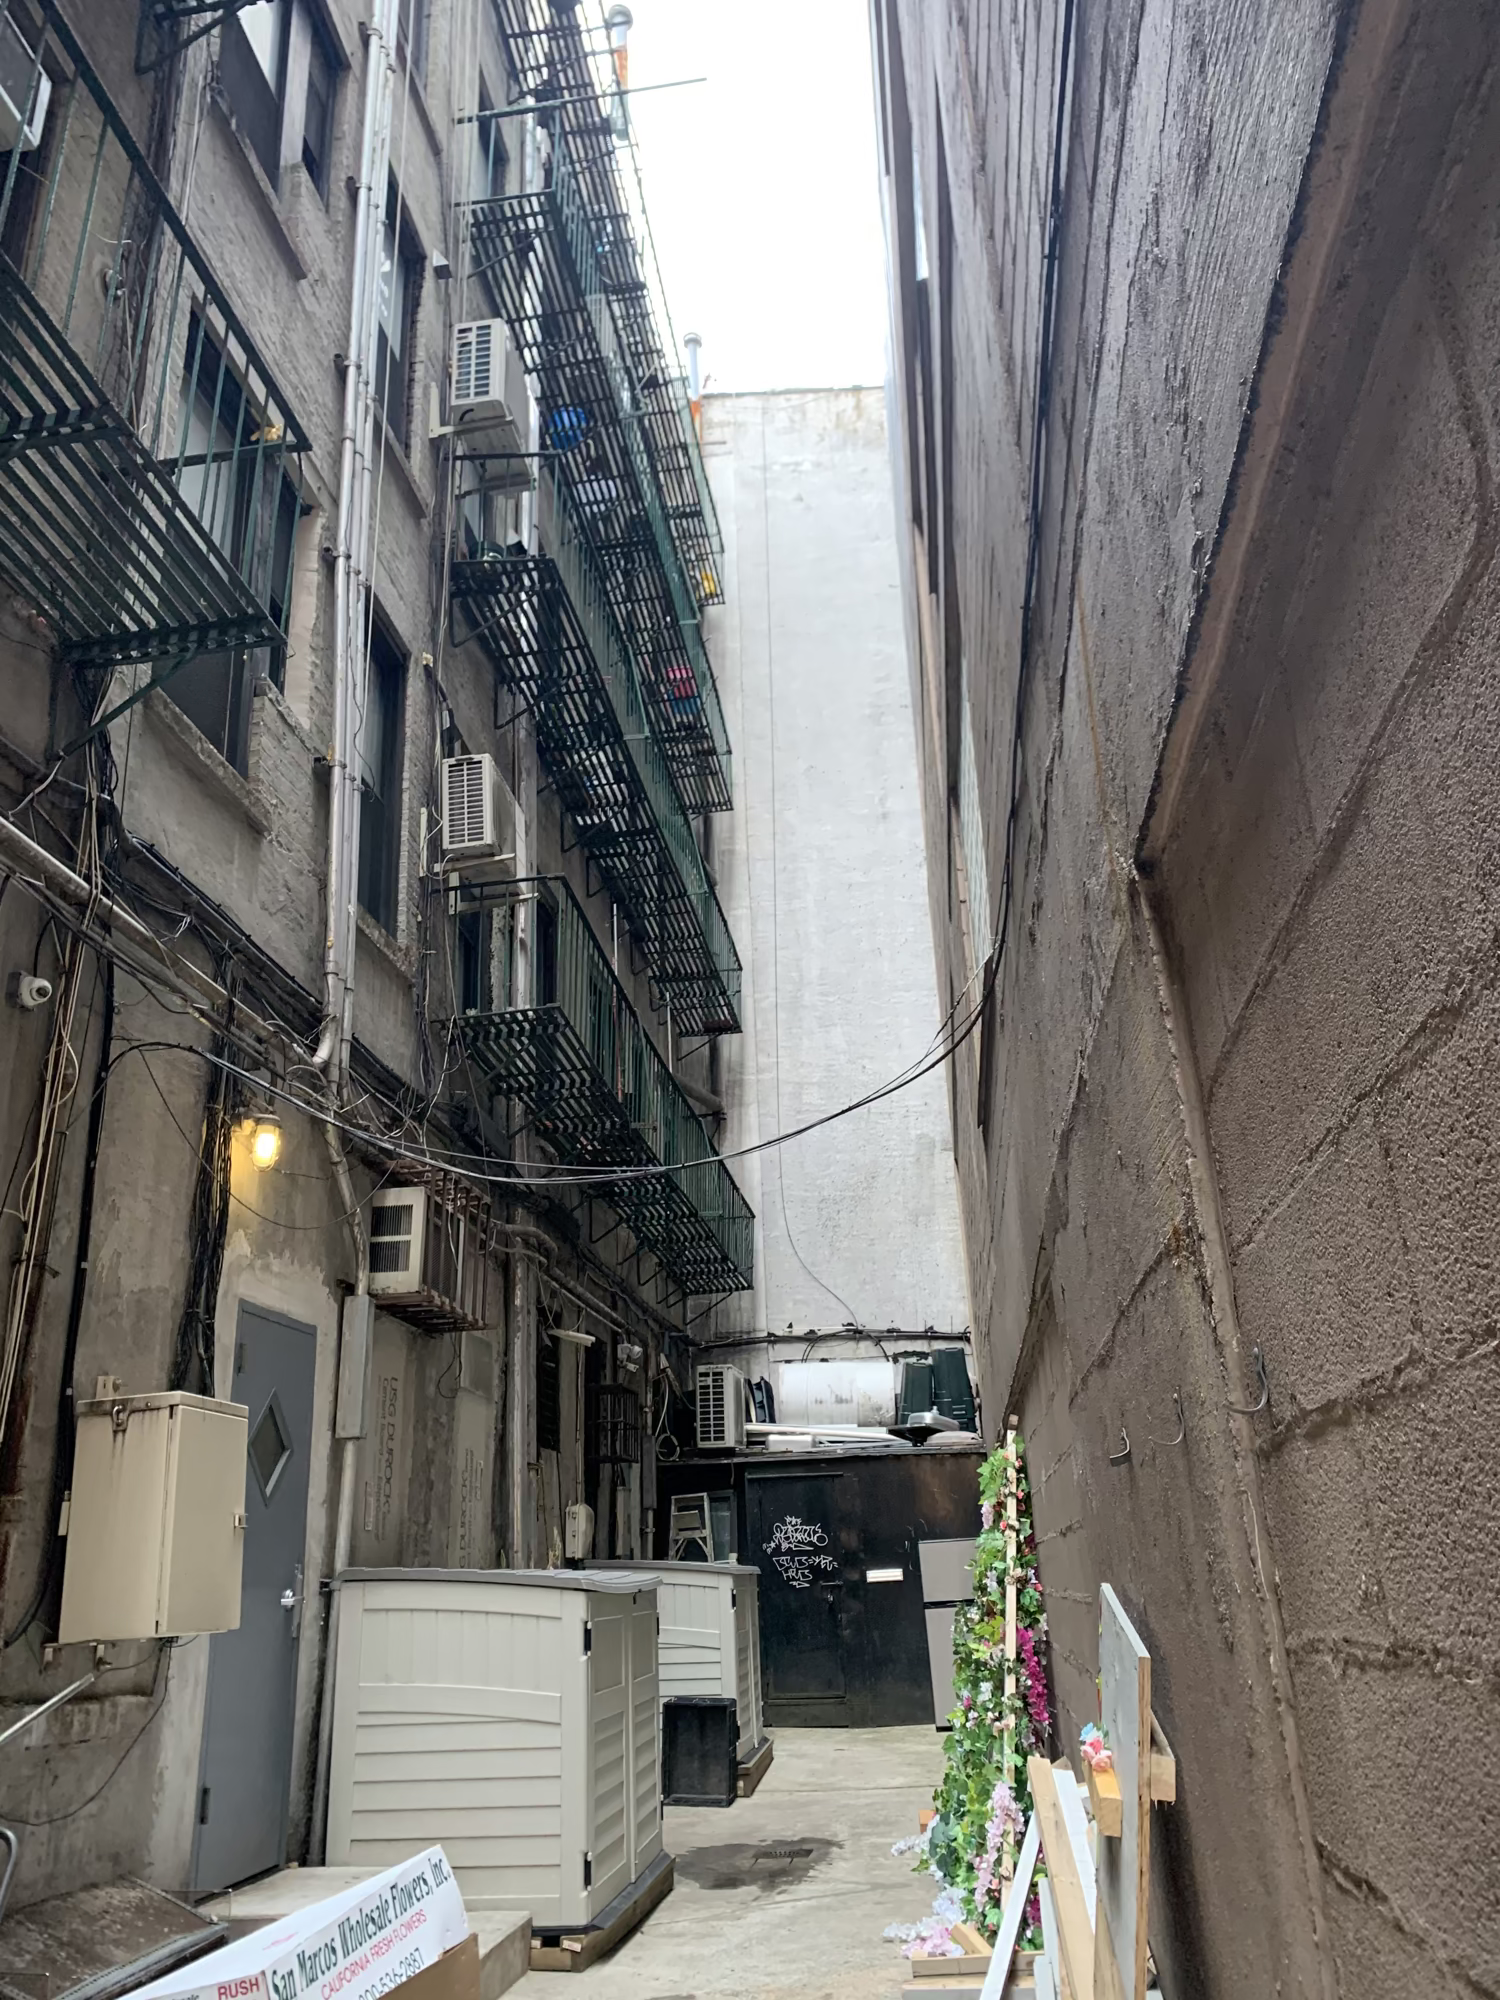

In [27]:
# Open an iPhone HEIC image stored on Google Drive
img = PIL.Image.open(Path(EXAMPLE_DATA_DIRECTORY) / "IMG_1605.HEIC")

# The last line in a notebook cell will get rendered
img

`PIL` is nice in that image objects give you a few ways to work with them out-of-the-box. In this case, the `Image` class has both methods and attributes. Methods are functions attached to the class or object; attribtues are data values attached to the class or object.

Complete object-oriented programming (OOP) is out-of-scope for this semester, but it's helpful to know that in Python, an object is a persistent "thing" that has associated information and actions. So in this case, you create an `Image` object, based on the class. And you can get information about the image, and perform actions to and with it.

In [28]:
# Some simple attribtues that give you information about the image
# What size is the image?
print(f"This image is {img.size} in pixel dimensions")

# What is the color mode of the image?
print(f"This image is in {img.mode} color mode")

# What's the full filename of this image?
print(f"The image is '{img.filename}'")

This image is (1500, 2000) in pixel dimensions
This image is in RGB color mode
The image is '/Users/brianho/Documents/GitHub/intro-to-urban-data/Measure/Example Data/IMG_1605.HEIC'


Pretty cool! You can find the complete list of `Image` attributes in the documentation for `PIL` [here](https://pillow.readthedocs.io/en/latest/reference/Image.html#image-attributes). Try to access a few new ones!

In [29]:
# Let's see all the info about this image!
img.info

{'primary': True,
 'bit_depth': 8,
 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0c\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00\x9e\x01\x10\x00\x02\x00\x00\x00\n\x00\x00\x00\xa4\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xae\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xb6\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x07\x00\x00\x00\xbe\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xc6\x01<\x00\x02\x00\x00\x00\n\x00\x00\x00\xda\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xe4\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x08$\x00\x00\x00\x00Apple\x00iPhone XS\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x0114.4.2\x00\x002021:04:04 14:53:54\x00iPhone XS\x00\x00$\x82\x9a\x00\x05\x00\x00\x00\x01\x00\x00\x02\x9a\x82\x9d\x00\x05\x00\x00\x00\x01\x00\x00\x02\xa2\x88"\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x88\'\x00\x03\x00\x00\x00\x01\x00d\x00\x00\x90\x00\x00\x07\x00\x00\

The `Image` class also provides some methods, or functions! For example, you can crop the image:

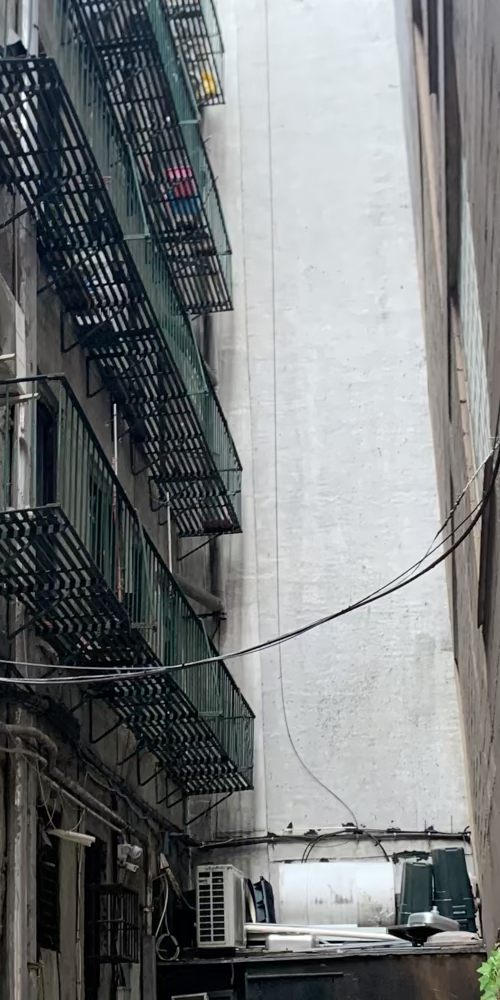

In [30]:
# Let's use a variable to store the crop
crop_amount = 500

# Crop takes in a tuple, or sequence of values in parenthesis () that define the min x, min y, max x and max y of the crop
img.crop((crop_amount, crop_amount, img.width - crop_amount, img.height - crop_amount))

You can find all of the methods defined for the `Image` class [here in the docs](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.crop). Try calling some of those methods on your loaded image.

## Resizing an image
One useful method is `Image.resize()` which produces a re-sized version of your image. It takes on argument: a tuple or sequence of values in side paranthesis (), which define the width and height.

You can use this to shrink and re-format and image!

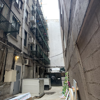

In [31]:
# Resive the photo to be square
smaller_img = img.resize((100, 100))
smaller_img

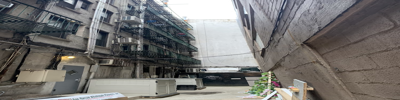

In [32]:
# Resize the photo to be stretched
stretched_img = img.resize((400, 100))
stretched_img

Of course, if you don't want to distort your image you can use `Image.thumbnail()`. This wil shrink it to fit your provided dimensions, but preserve the aspect ratio.

Confusingly, `thumbnail()` has a different behavior to `resize()`. Rather than give you a new image it directly modifies the original image. This is called "mutating" and the important concept is it's a change to the underlying object.

To be safe, you can use another method, `Image.copy()` to make an extra copy of the image to thumbnail!

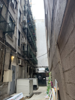

In [33]:
# Notice that we call thumbnail() on a copy() of the image
# thumbnail() directly changes the image, vs. returning a new one
# This line produces a new image as a copy
new_img = img.copy()

# This line reduces the copied image to a thumbnail
new_img.thumbnail((100, 100))

# This line renders the thumbnail in the notebook
new_img

## Color modes
`PIL` lets you work with images in a few color modes. These define how the image represents color data for each pixel. If you've used software for printing, you may be familiar with CMYK representations — which `PIL` does support! But in this course, for image data, you will most likely work with:

- `RGB` 3x8-bit pixels, true colour
- `RGBA` 4x8-bit pixels, true colour with alpha (transparency)
- `L` 8-bit pixels, usually greyscale
- `1` 1-bit pixels, black and white, stored with one pixel per byte
- `P` 8-bit pixels, using a palette (typically of 256 colors)

"8-bit pixels" mean the colors for a pixel are stored in the file as sets of eight bits, each of which can be either 1 or 0. If you remember your powers of two, this means 8-bits can represent 2^8 = 256 unique values. And so 3x8-bit pixel means the color is stored as 3 consecutive 8-bit values. For that reason, when you work with say an image in `RGB` mode, you'll see that each red, green, or blue value is defined as an integrer from 0 to 255. 8 bits are used quite a lot — and these are commonly referred to as "bytes"!

Remember, we use a 0-index. So starting from 0 and ending with 255 gives exactly 256 values.

In [34]:
# Let's check the mode of the smaller image we created earlier — it should be RGB
smaller_img.mode

'RGB'

In `RGB` mode, the color red is represented as (255, 0, 0): full value for red, and no value for green and blue.

`PIL` also makes it possiible to convert this image to an alternative color mode. `L` mode is what you might think of as "greyscale", represented by 256 possible color from white to black.

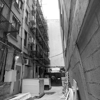

In [35]:
# Convert the image to a different color mode
# "L" is for "Luminance", but it means there's one color channel
# Which is equivalent to greyscale
smaller_img.convert("L")

And finally, the `1` mode means each pixel in the image is represented with a _single bit_. This means every pixel can be displayed entirely as either black or white. This produces a "dithering" effect as `PIL` applies some algorithms to convert colors to black and white.

This is a form of image data compression! Each pixel in `RGB` is represented by _three bytes_ with each byte being eight bits. In `L` mode, each pixel is reprersented by only _one bit_. So the files get much smaller, but you lose some meaning in the image. We'll play with this tension between summarizing data concisely and seeiing its full detail and color throughout the class.

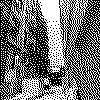

In [36]:
# Black and white — notice the dithering effect
smaller_img.convert("1")

Can you estimate roughly how much smaller in terms of file size do you think an image is, when you convert from `RGB` to `L` mode?

## Histogram
`PIL` can let you analyze color frequency in an image — another way to explore the data. Let's start with a histogram — a kind of data visualization that shows the frequency of values in a dataset.

In this case, we want to show how many pixels have each of the 256 values of red, green, and blue. This would let us understand: are those three components colors relatively matched? Is there a bias toward one in particular?

`PIL` has a nifty `Image.histogram()` method. This returns a list which is 256 x 3 = 768 values long. The list has (in order) the number of pixels for each value from 0 to 255 in first the red, then green, then blue colors. So something like:

```
[
    9934, # 9934 pixiels have an R value of 0 
    5430, # 5430 pixiels have an R value of 1
    ...
]
```

In [37]:
# Call the histogram method to get a list of frequency values
hist = img.histogram()

print(f"There are {len(hist)} items in the list, or 256 x 3.")
print(
    f"The first item looks like {hist[0]} — there are {hist[0]} pixels with a red value of 0"
)

print(f"The first five items look like {hist[:10]}")

There are 768 items in the list, or 256 x 3.
The first item looks like 9934 — there are 9934 pixels with a red value of 0
The first five items look like [9934, 5430, 6122, 6023, 5667, 5815, 5808, 6006, 6357, 6254]


OK, so we have our data. In order to plot it, we'll use `pandas` which provides some simply utilty methods to do so.

First, we need to make a DataFrame, or 2D table from the data. Here we use a range to get a slice from a liist — `hist[:256]` gets all the values from the 1st (0) to the 256th (255).

In [38]:
# We'll need pandas to make a DataFrame, or 2D table
import pandas as pd

# This creates a table with 3 columns, where each column is one of the R, G, or B colors
# The rows represent the number of pixels that have that R, G, or B value
# e.g. the 2nd row indicates how many pixels have R, G, and B values of 2.
df = pd.DataFrame({"red": hist[:256], "green": hist[256:512], "blue": hist[512:]})
df

red  green   blue
0     9934   2759   5803
1     5430   3957   2455
2     6122   5293   2713
3     6023   5425   3575
4     5667   4530   3988
..     ...    ...    ...
251   1195    730   2896
252   1354    711   2893
253   1080    969   4797
254   3325   2571   2336
255  86949  91001  89325

[256 rows x 3 columns]

Finally, we can plot the data table. This version of a histogram is a line graph, which shows one line for each color, and connects all the values between 0 and 255.

Look at the result — what does it mean? There's a large spike in values where R, G, or B equal 255. Why might that be? Hint: (255, 255, 255) is the RGB color for white.

<Axes: >

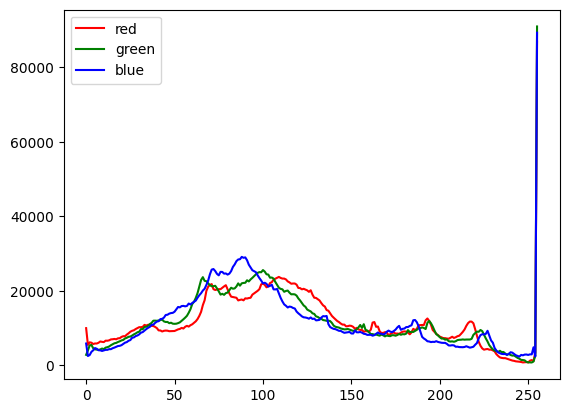

In [39]:
# Plot the histogram as a line frequency chart
df.plot(color=df.columns)

Of course, you can also plot this as a bar chart! Note that `pandas` makes some assumptions here, and groups sets of 5 consecutive color values together.

<Axes: >

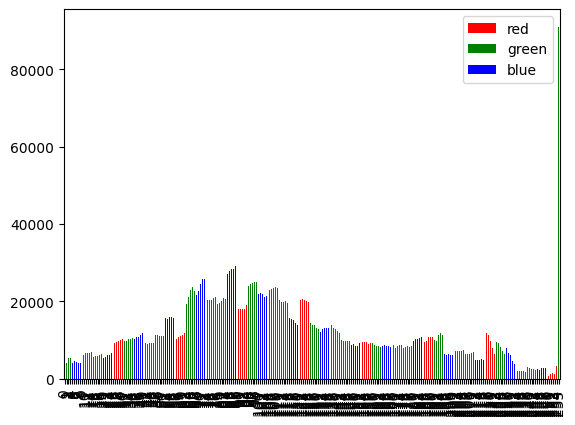

In [40]:
# Plot the histogram as a bar chart
df.plot.bar(color=df.columns)

## Color frequency
But what if you wanted to look at the actual colors, not just their R, G, and B channels? You can do that too!

This is a bit more complex. In the `RGB` mode, there are 256^3 = 16,777,216 possible colors. An image of 2000 px x 1500 px will only have 3,000,000 pixels. Trying to count the the number of pixels with a specific color might get you a very small count, and lots of zeros.

Instead, we'll want to do some compression that groups colors into a smaller, limited set of colors.

`PIL` has a dedicated `P` mode — for palette — that does exactlyt that! It reduces your image to 256 unique colors, which are stored as a palette. Then, each pixel gets a single byte (eight bits) that indiciates which color in the palette it belongs to.

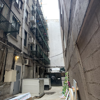

In [41]:
smaller_img

In [42]:
# Let's convert our RGB image to the P mode
p_img = smaller_img.convert("P")

We can use the `Image.getcolors()` method, which returns a list of pairs of values. Each pair is the count and color in the palette (0 to 255). So it looks something like:

```
[
    (10, 1), # ten pixels have the 2nd color in the palette
    (100, 0), # one hundred pixels have the 1st color iin the palette
    ...
]
```

In [43]:
# Get the number of pixels for each color in the palette
color_counts = p_img.getcolors()
color_counts

[(82, 0),
 (28, 11),
 (30, 16),
 (45, 17),
 (63, 46),
 (47, 47),
 (126, 52),
 (1450, 53),
 (309, 54),
 (140, 59),
 (513, 60),
 (17, 61),
 (4, 66),
 (2, 67),
 (282, 89),
 (184, 90),
 (3, 91),
 (217, 95),
 (2392, 96),
 (399, 97),
 (134, 102),
 (261, 103),
 (8, 104),
 (1, 109),
 (2, 110),
 (2, 111),
 (159, 132),
 (108, 133),
 (121, 138),
 (1018, 139),
 (99, 140),
 (2, 144),
 (74, 145),
 (152, 146),
 (5, 147),
 (85, 175),
 (59, 176),
 (96, 181),
 (639, 182),
 (34, 183),
 (61, 188),
 (19, 189),
 (86, 218),
 (32, 219),
 (63, 224),
 (347, 225)]

Next, we make a new `pandas` DataFrame from this data. This time, we start with two columns: `count` for the number of pixels and `color_index` for the color value in the palette.

In [44]:
# Make a pandas DataFrame (2D table)
df = pd.DataFrame(color_counts, columns=["count", "color_index"])

# Here are a few more DataFrame methods to check out work so far
print(f"The smallest color index is {df['color_index'].min()}")
print(f"The largest color index is {df['color_index'].max()}")
print(
    f"There are {df['count'].sum()} total pixels in the table. The image is {p_img.size} in size."
)
df

The smallest color index is 0
The largest color index is 225
There are 10000 total pixels in the table. The image is (100, 100) in size.


count  color_index
0      82            0
1      28           11
2      30           16
3      45           17
4      63           46
5      47           47
6     126           52
7    1450           53
8     309           54
9     140           59
10    513           60
11     17           61
12      4           66
13      2           67
14    282           89
15    184           90
16      3           91
17    217           95
18   2392           96
19    399           97
20    134          102
21    261          103
22      8          104
23      1          109
24      2          110
25      2          111
26    159          132
27    108          133
28    121          138
29   1018          139
30     99          140
31      2          144
32     74          145
33    152          146
34      5          147
35     85          175
36     59          176
37     96          181
38    639          182
39     34          183
40     61          188
41     19          189
42     86          218
43     32          219
44     63          224
45    347          225

In order to plot this chart with colors, we need to create a _third_ column `color` with the actual R, G, B values. We can do this with a `DataFrame.apply()` function. For this notebook, you just need to run the cell. Later in the course we'll learn to leverage `apply()` functions to perform operations on your data!

In [45]:
# Get the palette
p = p_img.getpalette()

# Create a color column based on the color_index column and the color palette
# We divide by 255 as we need R, G, B values in their decimial representation for plotting
df["color"] = df["color_index"].apply(
    lambda x: [v / 255.0 for v in p[x * 3 : x * 3 + 3]]
)
df

count  color_index            color
0      82            0  [0.0, 0.0, 0.0]
1      28           11  [0.2, 0.0, 0.0]
2      30           16  [0.0, 0.2, 0.0]
3      45           17  [0.2, 0.2, 0.0]
4      63           46  [0.0, 0.0, 0.2]
5      47           47  [0.2, 0.0, 0.2]
6     126           52  [0.0, 0.2, 0.2]
7    1450           53  [0.2, 0.2, 0.2]
8     309           54  [0.4, 0.2, 0.2]
9     140           59  [0.2, 0.4, 0.2]
10    513           60  [0.4, 0.4, 0.2]
11     17           61  [0.6, 0.4, 0.2]
12      4           66  [0.4, 0.6, 0.2]
13      2           67  [0.6, 0.6, 0.2]
14    282           89  [0.2, 0.2, 0.4]
15    184           90  [0.4, 0.2, 0.4]
16      3           91  [0.6, 0.2, 0.4]
17    217           95  [0.2, 0.4, 0.4]
18   2392           96  [0.4, 0.4, 0.4]
19    399           97  [0.6, 0.4, 0.4]
20    134          102  [0.4, 0.6, 0.4]
21    261          103  [0.6, 0.6, 0.4]
22      8          104  [0.8, 0.6, 0.4]
23      1          109  [0.6, 0.8, 0.4]
24      2          110  [0.8, 0.8, 0.4]
25      2          111  [1.0, 0.8, 0.4]
26    159          132  [0.4, 0.4, 0.6]
27    108          133  [0.6, 0.4, 0.6]
28    121          138  [0.4, 0.6, 0.6]
29   1018          139  [0.6, 0.6, 0.6]
30     99          140  [0.8, 0.6, 0.6]
31      2          144  [0.4, 0.8, 0.6]
32     74          145  [0.6, 0.8, 0.6]
33    152          146  [0.8, 0.8, 0.6]
34      5          147  [1.0, 0.8, 0.6]
35     85          175  [0.6, 0.6, 0.8]
36     59          176  [0.8, 0.6, 0.8]
37     96          181  [0.6, 0.8, 0.8]
38    639          182  [0.8, 0.8, 0.8]
39     34          183  [1.0, 0.8, 0.8]
40     61          188  [0.8, 1.0, 0.8]
41     19          189  [1.0, 1.0, 0.8]
42     86          218  [0.8, 0.8, 1.0]
43     32          219  [1.0, 0.8, 1.0]
44     63          224  [0.8, 1.0, 1.0]
45    347          225  [1.0, 1.0, 1.0]

<Axes: >

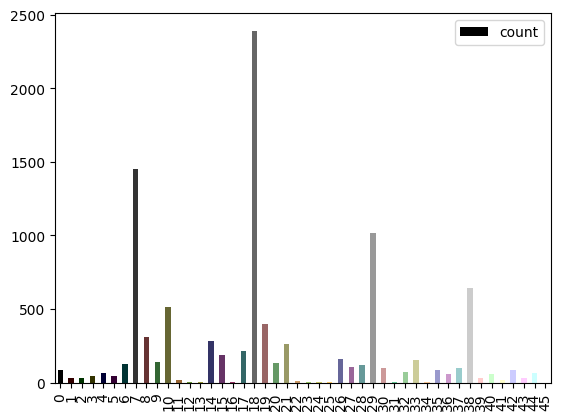

In [46]:
# Plot your colors
df.plot.bar(y="count", color=df["color"])

The above chart has each color in the palette on the X-axis, and the number of pixels with that color on the Y-axis. Note that the colors are sorted in a way that goes from black (0, 0, 0) to white (255, 255, 255). But because you are sorting values with three independent dimensions — red, green, and blue — there is not a definitive way to order them.

`PIL` makes an assumption about how best to sort the colors. But there are lots of alternatives ( [this](https://www.alanzucconi.com/2015/09/30/colour-sorting/) is a pretty good write-up). In general, this is a good example of how organizing and summarizing information is a choice with tradeoffs.

You'll need to navigate and negotiate similar choices in your own work over the semester.

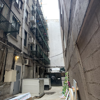

In [47]:
# Does it look right?
smaller_img

And of course, you should always check your work to see if it makes sense! As a very approximate "test" — does the color frequency displayed above match what you'd expect from the image thumbnaii?

## Accessing pixels
Of course, images are just pixels! And `PIL` gives you a way to look just at those.

If you access pixels directly on a high-res image, you'll notice there are a lot of them (e.g. all those megapixels you hear about on cameras — a 8064 x 6048 image is almost 50 _million_ pixels).

The power of `PIL`'s summary functions is that they handle all that pixel data for you. If you do want to access them directly, you should reduce the size of your rimage with `Image.resize()` or `Image.thumbnail()`.  

The thumbnailed image is (75, 100)


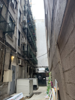

In [92]:
# Let's use the image we thumbnailed before.
print(f"The thumbnailed image is {new_img.size}")
new_img

`PIL` gives you ways to look at exactly one pixel, using its X and Y position. In `PIL`, pixels are ordered from top-left, with positive X being to the right and positive Y being down.

In [93]:
# Try getting a single pixel value
print(f"The RGB color value with the pixel at (0, 0) is {new_img.getpixel((0, 0))}")

The RGB color value with the pixel at (0, 0) is (61, 67, 77)


Of course, you can alos get _all_ the pixels! Again, as a note of warning this can create a large data object so use wiith cautioin.

`Image.getadata()` returns a custom `PIL` sequence, which can be converted to a more typical Python `list`. The pixels are ordered line-by-line, going left-to-right and top-to-bottom. 

In [95]:
# For simplicity, we'll convert this image from RGB to P mode
p_img = new_img.convert("P")

# Get all the pixels. This is done line-by-line.
pixels = list(p_img.getdata())

To help organize the pixels, we can create a list of lists. That is, if the image is organized as follow:

```
       col 1  col 2  col 3
row 1    1      2      4
row 2    0      0      1
...
```

We can create a list of lists that looks like:

```
[
  [1, 2, 4],
  [0, 0, 1],
  ...
]
```

This will require a loop to build up the list.

In [97]:
# We need the width of the image to help sort the data
width = p_img.width

# We'll create an empty list to hold the data
# What we want is a list of sublists. Each sublist should be a row of pixel colors.
pixel_data = []

# We'll create a loop that iterates as many times as there are rows
# The range() function loops from 0 to the provided number
# In this case, that's the number of pixels divided by the width
for row in range(len(pixels) // width):
    # Let's create our sublist, which goes from the
    # first to last pixel in the row
    row_data = pixels[row * width : (row + 1) * width]

    # We'll use the append() function to add our sublist
    pixel_data.append(row_data)

Now that we have the list of lists, we can more easily work with them. For example, as a table!

In [98]:
pd.DataFrame(pixel_data)

0   1   2   3    4    5    6    7    8    9   ...   65  66  67  68  69  \
0   53  53  53  95   54   95   53   53   53   95  ...  139  96  89  96  96   
1   96  89  53  89   96   90   59   89   53   89  ...  139  96  53  96  90   
2   95  90  59  53   53   96   89   53   89   96  ...  139  96  89  96  60   
3   96  95  89  53   89   60   89   53   53  138  ...  139  89  96  96  54   
4   96  96  96  53   53   89   96   53   89  139  ...  139  89  60  90  59   
..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..   
95  53  53  54  95   54   96   96   60   90   60  ...  102  97  96  96  96   
96  53  60  89  60   96   96   60   96   96   96  ...   96  96  97  96  60   
97  96  96  54  60   54   96   97  103   96   96  ...  103  60  96  97  97   
98  53  60  89  96   96  139  132   96  132  182  ...   97  96  96  96  96   
99  54  95  60  96  138   96  103  181  182  218  ...  102  97  96  61  96   

     70  71  72  73  74  
0    53  90  53  53  53  
1    59  89  60  89  54  
2    89  54  95  53  54  
3    95  54  89  59  90  
4    90  53  59  54  89  
..  ...  ..  ..  ..  ..  
95  103  96  96  96  60  
96   96  97  97  96  97  
97   96  96  96  97  96  
98  103  96  60  96  96  
99   97  97  96  60  54  

[100 rows x 75 columns]

## Metadata

In addition to pixels, we can retrieve data about the image itself — its metadata.

`PIL` lets you access the metadata, known as Exchangeable Image File Format (EXIF) information, with `Image.getexif()`. This returns top-level information as key-value pairs, but also nests some information deeper.

That deeper information includes GPS data, and can be accessed with `get_ifd()`.

In [104]:
def print_exif_info(img_file):
    """A helper function that prints EXIF information."""

    print(f"\n===== EXIF Metadata for {img_file} =====")

    # Create a PIL Image object
    img = PIL.Image.open(img_file)

    # Get the EXIF metadata
    img_exif = img.getexif()

    # This for loop iterates over img_exif
    # img_exif is structured like a dictionary — a set of key-value pairs
    # items() returns each pair one at a time
    for exif_tag, exif_value in img_exif.items():
        print(PIL.ExifTags.Base(exif_tag).name, exif_value)

    # In addition the base EXIF data, we can look for more IFDs
    # These are Image File Directories, and provide more info
    for ifd_id in PIL.ExifTags.IFD:
        # Not all images will have all IFDs!
        # The try here lets us view this info only if it exists
        try:
            ifd = img_exif.get_ifd(ifd_id)
            print(f"\n----- {ifd_id.name} -----")

            if ifd_id == PIL.ExifTags.IFD.GPSInfo:
                resolve = PIL.ExifTags.GPSTAGS
            else:
                resolve = PIL.ExifTags.TAGS

            for tag, value in ifd.items():
                tag_name = resolve.get(tag, tag)
                print(tag_name, value)

        except KeyError:
            pass

Let's try out this function!

In [49]:
print_exif_info(Path(EXAMPLE_DATA_DIRECTORY) / "IMG_1605.HEIC")


===== EXIF Metadata for Example Data/IMG_1605.HEIC =====
GPSInfo 2084
ResolutionUnit 2
ExifOffset 228
Make Apple
Model iPhone XS
Software 14.4.2
Orientation 1
DateTime 2021:04:04 14:53:54
YCbCrPositioning 1
XResolution 72.0
YResolution 72.0
HostComputer iPhone XS

----- Exif -----
ExifVersion b'0232'
ComponentsConfiguration b'\x01\x02\x03\x00'
ShutterSpeedValue 5.915456732763627
DateTimeOriginal 2021:04:04 14:53:54
DateTimeDigitized 2021:04:04 14:53:54
ApertureValue 1.6959938128383605
BrightnessValue 3.0788240439890027
ExposureBiasValue 0.0
MeteringMode 5
Flash 16
FocalLength 4.25
ColorSpace 65535
ExifImageWidth 4032
FocalLengthIn35mmFilm 26
SceneCaptureType 0
OffsetTime -04:00
OffsetTimeOriginal -04:00
OffsetTimeDigitized -04:00
SubsecTimeOriginal 418
SubjectLocation (2013, 1511, 2217, 1330)
SubsecTimeDigitized 418
ExifImageHeight 3024
SensingMethod 2
ExposureTime 0.016666666666666666
FNumber 1.8
SceneType b'\x01'
ExposureProgram 2
ISOSpeedRatings 100
ExposureMode 0
FlashPixVersion b

The above function prints EXIF metadata. if you want to get the data itself, you can be more direct:

In [114]:
def get_gps_info(img_file):
    """A helper function that gets GPS information."""

    # Create a PIL Image object
    img = PIL.Image.open(img_file)

    # Get the EXIF metadata
    img_exif = img.getexif()

    # The try clause here is needed in case there's no GPS data
    try:
        # Gets GPS metadata as a dictionary
        gps_data = img_exif.get_ifd(PIL.ExifTags.IFD.GPSInfo)

        # We'll create an empty dictionary to return
        gps_info = {}

        # Let's loop over each key-value pairr in the GPS data
        for tag, value in gps_data.items():
            # We get the proper name for each metadata tag
            tag_name = PIL.ExifTags.GPSTAGS.get(tag, tag)

            # ... and add it to the emptry dictionary
            gps_info[tag_name] = value

        return gps_info

    # If there's no GPS data, we get a KeyError
    except KeyError:
        return

Now we can get the GPS information as a dictionary!

In [117]:
gps_data = get_gps_info(Path(EXAMPLE_DATA_DIRECTORY) / "IMG_1605.HEIC")
gps_data

{'GPSLatitudeRef': 'N',
 'GPSLatitude': (40.0, 42.0, 56.97),
 'GPSLongitudeRef': 'W',
 'GPSLongitude': (73.0, 59.0, 57.36),
 'GPSAltitudeRef': b'\x00',
 'GPSAltitude': 13.448170047152159,
 'GPSSpeedRef': 'K',
 'GPSSpeed': 0.0,
 'GPSImgDirectionRef': 'T',
 'GPSImgDirection': 109.22115325693976,
 'GPSDestBearingRef': 'T',
 'GPSDestBearing': 109.22115325693976,
 'GPSDateStamp': '2021:04:04',
 'GPSHPositioningError': 65.0}

You'll notice that the latitude and longitude are written as tuples of degrees, minutes, and seconds. We can convert this to a more typical decimal degrees using another function wiith some basic math.

In [128]:
def parse_degrees_to_decimals(degrees, reference):
    """Transforms angular degrees into decimal degrees."""

    # The latitude and longitude are always positive in the EXIF data
    # In order to determine if the decimial value should be positive or negative
    # we check for "South" or "West" orientation
    sign = -1.0 if reference in ("S", "W") else 1.0
    decimals = degrees[0] + degrees[1] / 60 + (degrees[2] / (60/0 * 60.0))
    return decimals * sign

In [131]:
longitude = gps_data["GPSLongitude"]
longitude_ref = gps_data["GPSLongitudeRef"]
lng_in_decimals = parse_degrees_to_decimals(longitude, longitude_ref)
print(f"The image's longitude is {longitude} with {longitude_ref} reference")
print(f"In decimal degrees, this is {lng_in_decimals}.\n")

latitude = gps_data["GPSLongitude"]
latitude_ref = gps_data["GPSLongitudeRef"]
lat_in_decimals = parse_degrees_to_decimals(latitude, latitude_ref)
print(f"The image's latitude is {latitude} with {latitude_ref} reference")
print(f"In decimal degrees, this is {lat_in_decimals}.")

The image's longitude is (73.0, 59.0, 57.36) with W reference
In decimal degrees, this is -73.99289333333333.

The image's latitude is (73.0, 59.0, 57.36) with W reference
In decimal degrees, this is -73.99289333333333.
